In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[DataCamp Link](https://www.datacamp.com/courses/analyzing-marketing-campaigns-with-pandas)

**Course Description**

One of the biggest challenges when studying data science technical skills is understanding how those skills and concepts translate into real jobs. Whether you're looking to level up in your marketing job by incorporating Python and pandas or you're trying to get a handle on what kinds of work a data scientist in a marketing organization might do, this course is a great match for you. We'll practice translating common business questions into measurable outcomes, including "How did this campaign perform?", "Which channel is referring the most subscribers?", "Why is a particular channel underperforming?" and more using a fake marketing dataset based on the data of an online subscription business. This course will build on Python and pandas fundamentals, such as merging/slicing datasets, groupby(), correcting data types and visualizing results using matplotlib.

# 1.Pandas

In this chapter, you will review pandas basics including importing datasets, exploratory analysis, and basic plotting.

In [0]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv 
marketing = pd.read_csv('marketing.csv')

In [0]:
# Print the first five rows of the DataFrame
print(marketing.head())

      user_id date_served  ... subscribing_channel is_retained
0  a100000029      1/1/18  ...           House Ads        True
1  a100000030      1/1/18  ...           House Ads        True
2  a100000031      1/1/18  ...           House Ads        True
3  a100000032      1/1/18  ...           House Ads        True
4  a100000033      1/1/18  ...           House Ads        True

[5 rows x 12 columns]


In [0]:
# Print the statistics of all columns
print(marketing.describe())

           user_id date_served  ... subscribing_channel is_retained
count        10037       10021  ...                1856        1856
unique        7309          31  ...                   5           2
top     a100000882     1/15/18  ...           Instagram        True
freq            12         789  ...                 600        1279

[4 rows x 12 columns]


In [0]:
# Check column data types and non-missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
user_id                10037 non-null object
date_served            10021 non-null object
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null object
date_canceled          577 non-null object
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
dtypes: object(12)
memory usage: 941.1+ KB
None


###Data types and data merging


####Updating the data type of a column

- In this exercise, you will modify the data type of the `is_retained` column.

In [0]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


- Update the data type of the is_retained column to boolean and then check its data type again.

In [0]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


####Adding new columns

In this exercise, you will add two columns to `marketing`:

- `day_of_week`: represents the day of the week as an integer (we added a new column, day that represents the day of the week and defined a dictionary that maps the day of the week to each numerical value from 0 to 6 for this purpose.)
- `is_correct_lang`: conveys whether the ad was shown to the user in their preferred language

- Add a new column, `channel_code`, which maps the values in the `subscribing_channel` column to a numeric scale using the `channel_dict` dictionary.

In [0]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

- Add a new column, `is_correct_lang`, which is 'Yes' if the user was shown the ad in their preferred language, 'No' otherwise.

In [0]:
# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

In [0]:
# Print the first five rows of the DataFrame
print(marketing.head())

      user_id date_served  ... channel_code is_correct_lang
0  a100000029      1/1/18  ...          1.0             Yes
1  a100000030      1/1/18  ...          1.0             Yes
2  a100000031      1/1/18  ...          1.0             Yes
3  a100000032      1/1/18  ...          1.0             Yes
4  a100000033      1/1/18  ...          1.0             Yes

[5 rows x 14 columns]


####Date columns

In this exercise, you will practice reading the CSV with proper date columns and create a day of the week column.

- Import pandas into the environment with the alias pd.
- Read `'marketing.csv'` into your environment correctly identifying date columns,`'date_served'` `'date_subscribed'` and `'date_canceled'` within your call to `read_csv()`.
- Create a day of week column from `'date_subscribed'` using `dt.dayofweek`.

In [0]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [0]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0


###Initial exploratory analysis


####Daily marketing reach by channel

In this exercise, you'll determine how many users are seeing the marketing assets each day. 


- Group the `marketing` DataFrame by `'date_served'` and count the number of unique user IDs.

In [0]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


####Visualizing daily marketing reach

To make it easier for you and your business stakeholders to notice subscriber trends, you will visualize your results using a line plot.

- Use the .plot() method to visualize the results of date_served.
- Add the title 'Daily users' and the y-axis label 'Number of users'.
- Rotate the x-axis labels by 45 degrees.
- Display the plot.

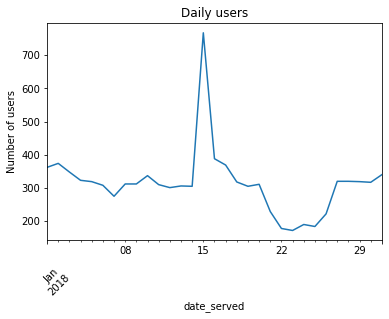

In [0]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

# 2.Exploratory Analysis & Summary Statistics

In this chapter, you will learn about common marketing metrics and how to calculate them using pandas. You will also visualize your results and practice user segmentation.

###Introduction to common marketing metrics


####Calculating conversion rate

On marketing teams, conversion rate is typically the most important metric. It is one of the best ways to determine how effective a marketing team was at gaining new customers.

As a reminder, conversion rate is the percentage of the users who saw our marketing assets and subsequently became subscribers.

$\frac{Number of people who convert} {Total number of people who we market to}$

- Calculate the number of unique `user_ids` in `marketing` DataFrame.
- Calculate the number of people who subscribed using the `converted` column.
- Calculate the conversion rate.

In [0]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


####Calculating retention rate

Conversion rate and retention rate function hand-in-hand; you could create a business with a high conversion rate by giving users a free trial, but have a low retention rate once users are charged for your services.

The formula for retention rate is:

$\frac{Number of people who remain subscribed}{Total number of people who converted}$

- Calculate the number of subscribers using the `user_id` and `converted` columns in the `marketing` DataFrame.
- Calculate the number of retained subscribers using the boolean columns `user_id` and `is_retained`.
- Calculate the retention rate.

In [0]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]\
                   ['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


###Customer segmentation


####Comparing language conversion rate

- Using the `marketing` DataFrame, include only the rows where `language_displayed` is English.
- Calculate the total number of users in the `english_speakers` DataFrame.
- Calculate the number of conversions in the `english_speakers` DataFrame.

In [0]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


- Group the `marketing` DataFrame by `language_displayed` and count the number of unique users in the dataset.
- Group `marketing` by `language_displayed` again, this time calculating the number of unique users who converted.
- Calculate the conversion rate for all languages.

In [0]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])\
                                  ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True]\
                       .groupby(['language_displayed'])\
                       ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


####Aggregating by date

- Group the `marketing` DataFrame by `date_served` and count the number of unique users per day.
- Isolate converted users in `marketing` while grouping by `date_served` and counting the number of unique converted users per day.

In [0]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


###Plotting campaign results (I)


####Visualize conversion rate by language

- Create a bar chart using the `language_conversion_rate` DataFrame.
- Add the title `'Conversion rate by language\n'` to your chart with font size 16.
- Add an x-axis label, `'Language'`, and a y-axis label, `'Conversion rate (%)'`, both with font size 14.
- Display the plot.

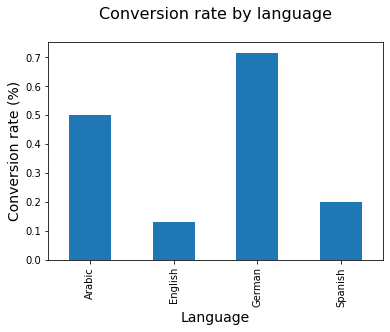

In [0]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Language', size = 14)

# Display the plot
plt.show()

####Creating daily conversion rate DataFrame


- Group `marketing` by `'date_served'` and calculate the unique number of user IDs.
- Select only the rows in marketing where `converted` equals `True`. Group the result by `'date_served'` and calculate the unique number of user IDs.

In [0]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total

####Setting up our data to visualize daily conversion

- Reset the index of `daily_conversion_rate` and use `pd.DataFrame` to convert the results into a DataFrame.
- Rename the `daily_conversion_rate` columns to `'date_served'` and `'conversion_rate'`.

In [0]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                                 'conversion_rate']

In [0]:
daily_conversion_rate.head()

,date_served,conversion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392


####Visualize daily conversion rate


- Create a line chart using the daily_conversion_rate DataFrame.
- Set the y-axis of your chart to begin at 0.
- Display the chart.

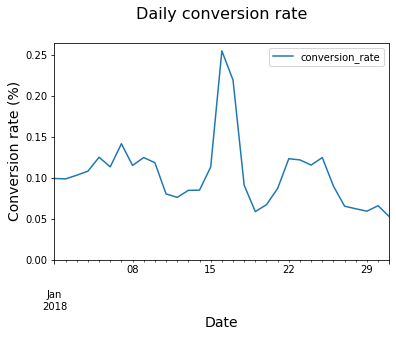

In [0]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', #'date_subscribed', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

####Plotting campaign results (II)


####Marketing channels across age groups

In this exercise, you will create a grouped bar chart showing how many people each marketing channel reached by age group.

- Unstack `channel_age` with `level = 1` and transform the result into a DataFrame.
- Plot `channel_age` as a grouped bar chart.
- Add a legend in the upper right and set the labels equal to `channel_age_df.columns.values`.

In [0]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0


In [0]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

In [0]:
channel_age_df.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


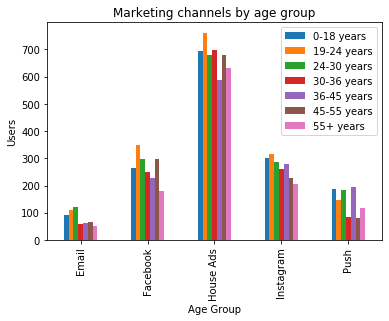

In [0]:
# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

####Grouping and counting by multiple columns


- Use `.groupby()` to calculate subscribers by `subscribing_channel` and `date_subscribed`.

In [0]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


- Use `.groupby()` to calculate retained subscribers by `subscribing_channel` and `date_subscribed`.

In [0]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


####Analyzing retention rates for the campaign

In this exercise, you will calculate the retention rate for each subscription channel and visualize your results.

- Divide `retention_subs` by `retention_total` to get the retention rate by subscribing channel by date subscribed.
- Add the title `'Retention Rate by Subscribing Channel'`.
- Name the x-axis label and y-axis label `'Date Subscribed'` and `'Retention Rate (%)'` respectively.
- Place the legend in the `upper right` and display the plot.

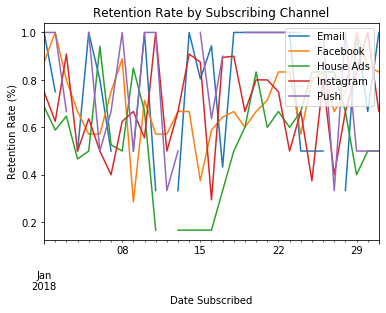

In [0]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

# 3. Conversion Attribution

In this chapter, you will build functions to automate common marketing analysis and determine why certain marketing channels saw lower than usual conversion rates during late January.

###Building functions to automate analysis


####Building a conversion function

In this exercise, you will build a function that takes a DataFrame and list of column names and outputs the conversion rate across the column(s).

- Isolate rows in the user inputted `dataframe` where users were converted, then group by the list of user inputted `column_names` and count the number of unique converted users.
- Group the user inputted `dataframe` by the list of user inputted `column_names` and calculate the total number of users.
- Fill any missing values in `conversion_rate` with `0`.

In [0]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

####Test and visualize conversion function

- Use your `conversion_rate()` function to calculate the conversion rate in `marketing` by `date_served` and age_group and store your results in `age_group_conv`.
- Unstack `age_group_conv` at level equal to 1 and wrap that in a call to `pd.DataFrame()` to create `age_group_df`.
- Create a line chart to display your results from `age_group_df`.

In [0]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0


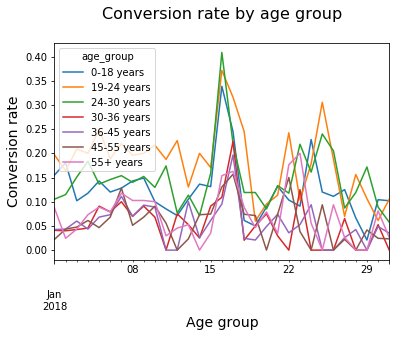

In [0]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served',
                                             'age_group'])

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

####Plotting function

In this exercise, you will build a function to plot the results of your conversion rate function.

- Create a for loop for each `column` in the `dataframe`.
- Plot a line chart of the column by the DataFrame's index.
- Show the plot.

In [0]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

####Putting it all together


- Using your `conversion_rate()` function, create a new DataFrame called `age_group_conv` which contains conversion rate by `date_served` and `age_group` from the marketing DataFrame.
- Unstack `age_group_conv` to create a DataFrame with each age group as a column. This step has already been done for you.
- Use your `plotting_conv()` function to plot the conversion rates for each age group.

In [0]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

In [0]:
age_group_conv.head()

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
Name: user_id, dtype: float64

In [0]:
# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

In [0]:
age_group_df.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889


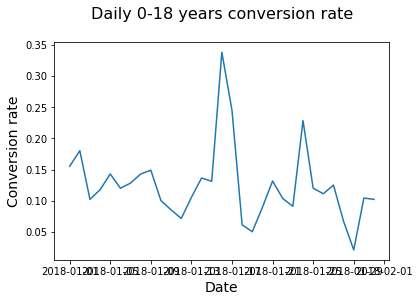

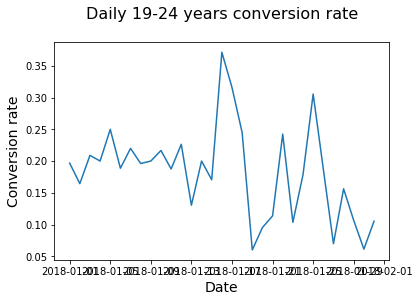

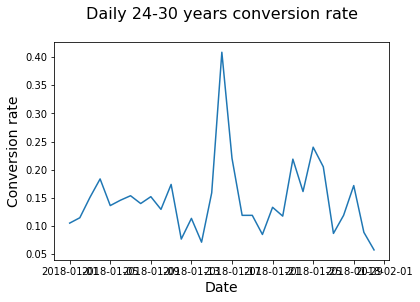

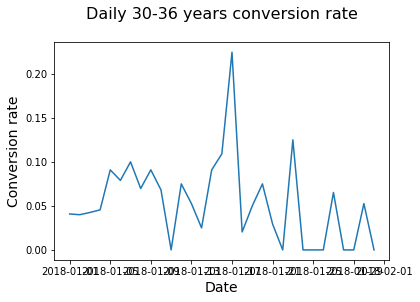

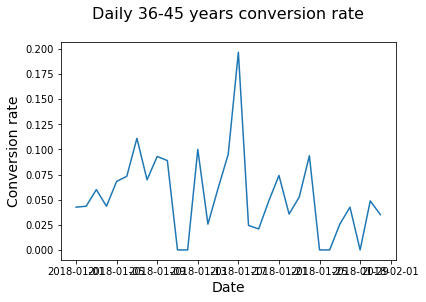

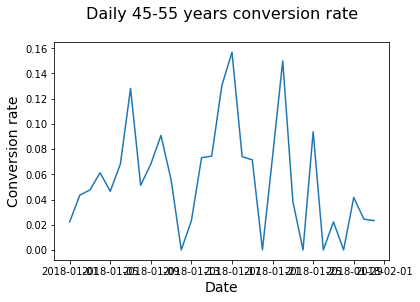

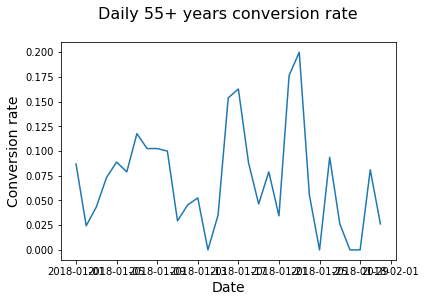

<Figure size 432x288 with 0 Axes>

In [0]:
# Plot the results
plotting_conv(age_group_df)

###Identifying inconsistencies


####House ads conversion rate

In this exercise, you'll try out your `conversion_rate()` and `plotting_conv()` functions out on `marketing` looking at conversion rate by `'date_served'` and `'marketing_channel'`.

In [0]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


- Unstack `daily_conv_channel` with level equal to one and convert the result into a DataFrame.
- Try out your `plotting_conv()` function on `daily_conv_channel`.

In [0]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

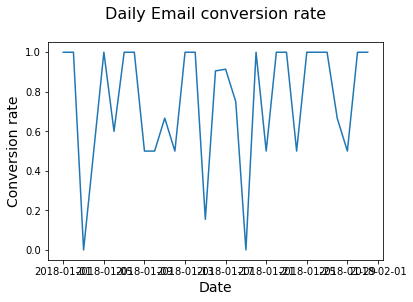

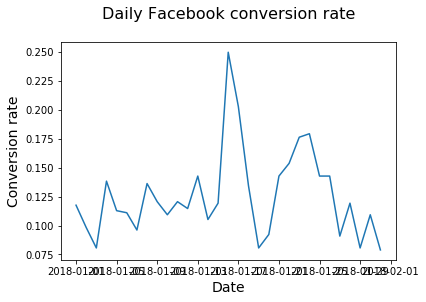

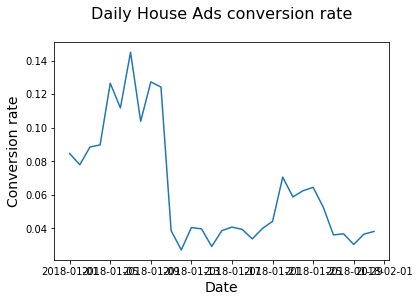

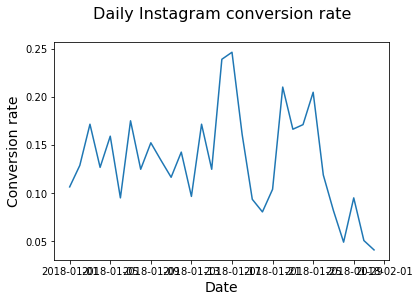

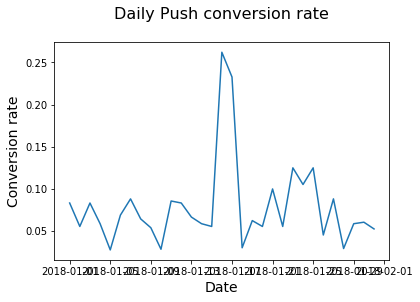

<Figure size 432x288 with 0 Axes>

In [0]:
# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

####
Analyzing House ads conversion rate
Now that you have confirmed that house ads conversion has been down since January 11, you will try to identify potential causes for the decrease.

As a data scientist supporting a marketing team, you will run into fluctuating metrics all the time. It's vital to identify if the fluctuations are due to expected shifts in user behavior (i.e., differences across the day of the week) versus a larger problem in technical implementation or marketing strategy.

In this exercise, we will begin by checking whether users are more likely to convert on weekends compared with weekdays and determine if that could be the cause for the changing house ads conversion rate.

- Add a day of week column to the `marketing` DataFrame using `dt.dayofweek` based on the `'date_served'` column.
- Use `conversion_rate` to calculate conversion by the day of week and marketing channel and store the results in `DoW_conversion`.
- Create a line plot of the results, set the y-axis to begin at 0 and display the plot.

In [0]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

In [0]:
marketing.tail()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,DoW_served
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,2.0,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,2.0,4.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,2.0,2.0
10036,a100007294,2018-01-06,Facebook,control,False,German,German,0-18 years,2018-01-17,NaT,Email,True,2.0,5.0


In [0]:
# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

In [0]:
DoW_df.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DoW_served,,,,,
0.0,0.162621,0.119601,0.062660,0.122517,0.064516
1.0,0.906250,0.147887,0.070312,0.151943,0.115854
2.0,0.837209,0.127036,0.075269,0.150160,0.105882
3.0,0.727273,0.133333,0.059034,0.143498,0.067797
4.0,0.666667,0.110132,0.062278,0.129870,0.055556


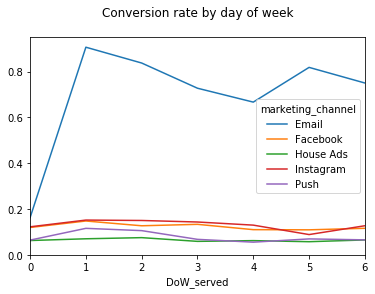

In [0]:
# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

####House ads conversion by language

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be your job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's your job to think creatively to identify the cause.

- Create a new DataFrame `house_ads` by isolating the rows from `marketing` where `marketing_channel` equals 'House Ads'.
- Run your `conversion_rate()` function on the `house_ads` DataFrame grouping by `date_served` and `language_displayed`.
- Use the `plotting_conv()` function on `conv_lang_df` to display your results.

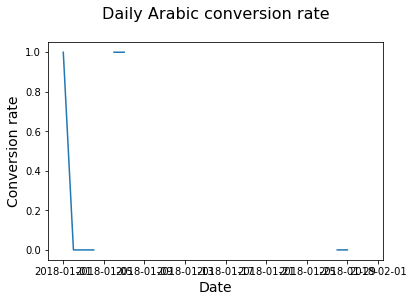

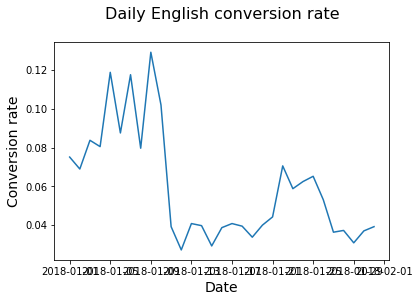

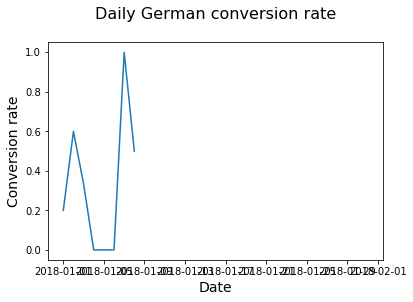

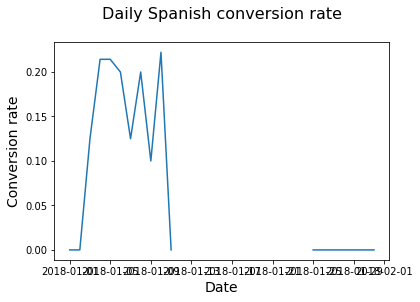

<Figure size 432x288 with 0 Axes>

In [0]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                     'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use plotting function to display results
plotting_conv(conv_lang_df)

####Creating a DataFrame for house ads

As a data scientist, it is your job to provide your marketing stakeholders with as specific feedback as possible as to what went wrong to maximize their ability to correct the problem.

- Use `np.where()` to create a new column in `house_ads` called `'is_correct_lang'` whose values are `'Yes'` if `'language_displayed'` is equal to `'language_preferred'` and `'No'` otherwise.
- Group by `date_served` and `is_correct_lang` to get a daily count of the ads served.

In [0]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
language_check.head()

date_served  is_correct_lang
2018-01-01   No                   2
             Yes                189
2018-01-02   No                   3
             Yes                247
2018-01-03   Yes                220
Name: is_correct_lang, dtype: int64

In [0]:
language_check_df.head()

is_correct_lang,No,Yes
date_served,,
2018-01-01,2.0,189.0
2018-01-02,3.0,247.0
2018-01-03,0.0,220.0
2018-01-04,0.0,168.0
2018-01-05,0.0,160.0


In [0]:
# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


####Confirming house ads error

- Add a `pct` column to `language_check_df` which divides the count where language is correct by the row sum extracted using the `.sum()` method.
- Make a line plot with the date as the x-axis and the `pct` column as the y-axis and show your results.

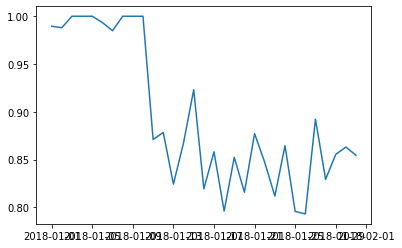

In [0]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

####Resolving inconsistencies


####Setting up conversion indexes

Now that you've determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In this exercise, you will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

In [0]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


####Analyzing user preferences

In this step, you will create a new DataFrame that you can perform calculations on to determine the expected number of subscribers. This DataFrame will include how many users prefer each language by day. 

Once you have the DataFrame, you can begin calculating how many subscribers you would have expected to have had the language bug not occurred.

- Group `house_ads` by `date_served` and `language_preferred`.
- Use a dictionary within a call to `.agg()` to calculate the number of unique users and sums the number of converted users.
- Unstack `converted` at `level = 1`

In [0]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

####Creating a DataFrame based on indexes

An expected conversion DataFrame named `converted` has been created for you grouping `house_ads` by date and preferred language. It contains a count of unique users as well as the number of conversions for each language, each day.

For example, you can access the number of Spanish-speaking users who received house ads using `converted[('user_id','Spanish')]`.

- Use `.loc` to create the column `english_conv_rate` in `converted` with the English conversion rate between `'2018-01-11'` and `'2018-01-31'`.
- Create expected conversion columns for each language by multiplying `english_conv_rate` by each language index (`spanish_index, arabic_index` or `german_index`).
- Multiply each language's expected conversion rate by the number of users who should have received house ads.

In [0]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted[('user_id','German')]

####Assessing bug impact
It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. 


- Create the `converted` DataFrame by using `.loc` to select only rows where the date is between `'2018-01-11'` and `'2018-01-31'`.
- Sum the expected subscribers columns for each language in `converted` and store the results in `expected_subs`.
- Sum the actual subscribers for each language in `converted` and store the results in `actual_subs`.
- Subtract `actual_subs` from `expected_subs` to determine how many subscribers were lost due to the bug.

In [0]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

# 4. Personalization A/B Test

In this chapter, you will analyze an A/B test and learn about the importance of segmentation when interpreting the results of a test.

###A/B testing for marketing

When running an A/B test when is the right time to determine key success metrics?


```
When designing the experiment.
```



In [0]:
marketing = pd.read_csv("marketing_new.csv", index_col=0)
print(marketing.shape)
marketing.tail()

(10037, 15)


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0,4.0,Yes
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaN,Email,True,2.0,4.0,Yes
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaN,Email,True,2.0,4.0,Yes
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaN,Email,True,2.0,4.0,Yes
10036,a100007294,2018-01-06,Facebook,control,False,German,German,0-18 years,2018-01-17,NaN,Email,True,2.0,4.0,Yes


- Isolate the rows of `marketing` where the `'marketing_channel'` is `'Email'` and store the results in `email`.
- Group `marketing` by variant and sum the unique users and store the results in `alloc`.
- Plot the results of `alloc` in a bar chart.

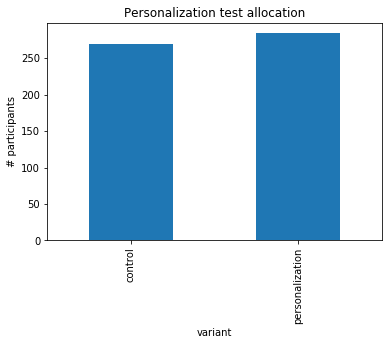

In [0]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

####Comparing conversion rates

Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. 

In [0]:
email.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
354,a100000526,2018-01-01,Email,personalization,True,Arabic,Arabic,0-18 years,2018-01-01,NaN,Email,True,0.0,4.0,Yes
358,a100000530,2018-01-05,Email,personalization,True,Arabic,Arabic,19-24 years,2018-01-05,NaN,Email,True,4.0,4.0,Yes
362,a100000534,2018-01-09,Email,personalization,False,English,English,45-55 years,2018-01-09,NaN,Email,True,1.0,4.0,Yes
366,a100000538,2018-01-13,Email,personalization,True,Arabic,Arabic,24-30 years,2018-01-13,2018-01-23,Email,False,5.0,4.0,Yes
370,a100000542,2018-01-17,Email,personalization,True,English,English,0-18 years,2018-01-17,2018-02-12,Email,False,2.0,4.0,Yes


- Group the `email` DataFrame by `user_id` and `variant` while selecting the maximum value of the `converted` column and store the results in `subscribers`.
- Drop missing values from the `control` column of `subscribers_df`.
- Drop missing values from the `personalization` column of `subscribers_df`.
- Calculate the conversion rate for both `personalization` and `control` using the appropriate function for each.

In [0]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


In [0]:
subscribers.head()

user_id     variant        
a100000526  personalization     True
a100000530  personalization     True
a100000534  personalization    False
a100000538  personalization     True
a100000542  personalization     True
Name: converted, dtype: bool

In [0]:
subscribers_df[:5]

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True


###Calculating lift & significance testing


####Creating a lift function

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. 

The result is the percent difference between the control and treatment.

- Calculate the mean of `a` and `b` using `np.mean()`.
- Use `a_mean` and `b_mean` to calculate the lift of the treatment.
- Print the results of the `lift()` function you created using the `control` and `personalization` variables.

In [0]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


###A/B testing & segmentation


####Building an A/B test segmenting function

Since you want to segment our data multiple times, you will build a function `ab_segmentation()` that analyzes the impact of your A/B tests on segments of data that you can reuse each time you want to conduct this kind of analysis.

Your function will take in a column name and run through each unique value in that column calculating lift and statistical significance.

- Build a for loop within our `ab_segmentation()` function that runs through each unique value in the user-inputted column name `segment`.
- Isolate the rows in marketing where the marketing channel is `'Email'` and the user-inputted column `segment` equals `subsegment`.
- Print the results of the `lift()` and `stats.ttest_ind()` functions.

In [0]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes


In [0]:
from scipy import stats

In [0]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

- Run our `ab_segmentation()` function on `'language_displayed'`.

In [0]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




- Run our `ab_segmentation()` function on `'age_group'`.

In [0]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 


